# Text-Guided Editing of Images (Using CLIP and StyleGAN)

In [ ]:
#!git clone https://github.com/orpatashnik/StyleCLIP.git

#import os
#os.chdir(f'./StyleCLIP')

#!pip install ftfy regex tqdm
#!pip install git+https://github.com/openai/CLIP.git

In [1]:
import os
os.chdir('../')
print(os.getcwd())

/home/tiworks/GAN/StyleCLIP


In [2]:
from utils import ensure_checkpoint_exists
from mapper.scripts.inference import run

We provide several pretrained mappers. We also provide sample latent codes, of 6 celebs. 'n_images' allows to choose the number of latent codes (from the path provided in 'latent_path') that will be edited. If n_images is None then all the latent codes will be edited.

In [15]:
meta_data = {
  'afro': ['afro', False, False, True], 
  'angry': ['angry', False, False, True], 
  'Beyonce': ['beyonce', False, False, False], 
  'bobcut': ['bobcut', False, False, True], 
  'bowlcut': ['bowlcut', False, False, True], 
  'curly hair': ['curly_hair', False, False, True], 
  'Hilary Clinton': ['hilary_clinton', False, False, False],
  'Jhonny Depp': ['depp', False, False, False], 
  'mohawk': ['mohawk', False, False, True],
  'purple hair': ['purple_hair', False, False, False], 
  'surprised': ['surprised', False, False, True], 
  'Taylor Swift': ['taylor_swift', False, False, False],
  'trump': ['trump', False, False, False], 
  'Mark Zuckerberg': ['zuckerberg', False, False, False]    
}

edit_type = 'purple hair' #@param ['afro', 'angry', 'Beyonce', 'bobcut', 'bowlcut', 'curly hair', 'Hilary Clinton', 'Jhonny Depp', 'mohawk', 'purple hair', 'surprised', 'Taylor Swift', 'trump', 'Mark Zuckerberg']
edit_id = meta_data[edit_type][0]
os.makedirs("mapper/pretrained", exist_ok=True)
ensure_checkpoint_exists(f"mapper/pretrained/{edit_id}.pt")
latent_path = "example_celebs.pt" #@param {type:"string"}
if latent_path == "example_celebs.pt":
  ensure_checkpoint_exists("example_celebs.pt")
n_images =  2#@param

args = {
    "work_in_stylespace": False,
    "exp_dir": "results/",
    "checkpoint_path": f"mapper/pretrained/{edit_id}.pt",
    "couple_outputs": True,
    "mapper_type": "LevelsMapper",
    "no_coarse_mapper": meta_data[edit_type][1],
    "no_medium_mapper": meta_data[edit_type][2],
    "no_fine_mapper": meta_data[edit_type][3],
    "stylegan_size": 1024,
    "test_batch_size": 1,
    "latents_test_path": latent_path,
    "test_workers": 1,
    "n_images": n_images
}


In [16]:
from argparse import Namespace
run(Namespace(**args))

Loading from checkpoint: mapper/pretrained/purple_hair.pt


 33%|███████████████                              | 2/6 [00:00<00:00,  5.75it/s]

Runtime 0.0186+-0.0009


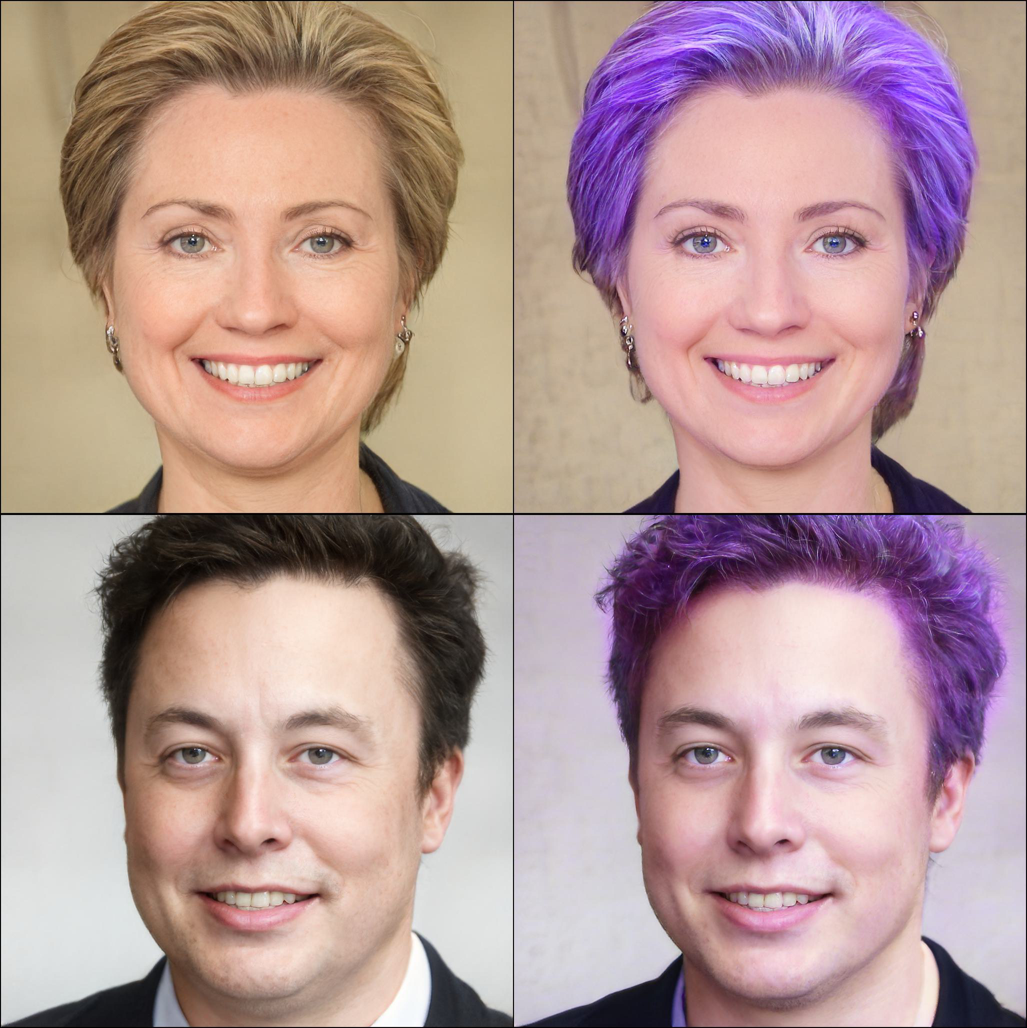

In [17]:
from PIL import Image
result = Image.open(f"results/inference_results/00000.jpg")
result = result.resize((int(result.width * 0.5), int(result.height * 0.5)))
grid = Image.new("RGB", (result.width, result.height * n_images))
grid.paste(result, (0, 0))
for i in range(1, n_images):
  result = Image.open(f"results/inference_results/{str(i).zfill(5)}.jpg")
  result = result.resize((int(result.width * 0.5), int(result.height * 0.5)))
  grid.paste(result, (0, int(result.height * i)))
grid